In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score', 'Genre': 'Sex'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Sex                 200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


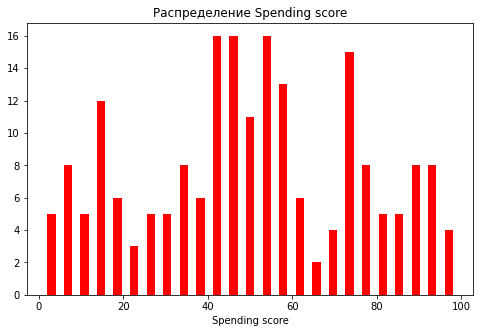

In [6]:
plt.figure(figsize = (8,5))
plt.hist(df['Spending Score'], bins = 25, rwidth = 0.5, color = 'red')
plt.xlabel('Spending score')
plt.title('Распределение Spending score')
plt.show();

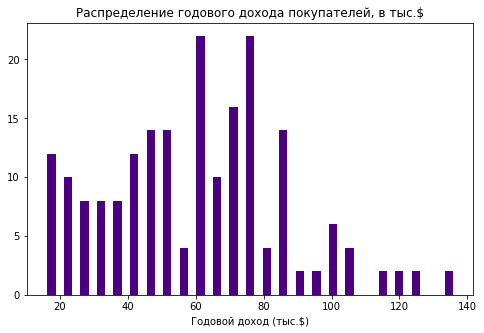

In [7]:
plt.figure(figsize = (8,5))
plt.hist(df['Annual Income (k$)'], bins = 25, rwidth = 0.5, color = 'indigo')
plt.xlabel('Годовой доход (тыс.$)')
plt.title('Распределение годового дохода покупателей, в тыс.$')
plt.show();

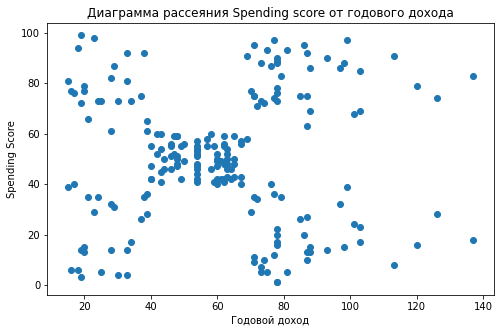

In [8]:
plt.figure(figsize = (8,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score'])
plt.xlabel('Годовой доход')
plt.ylabel('Spending Score')
plt.title('Диаграмма рассеяния Spending score от годового дохода')
plt.show();

In [9]:
df['Annual Income (k$)'].corr(df['Spending Score'])

0.009902848094037605

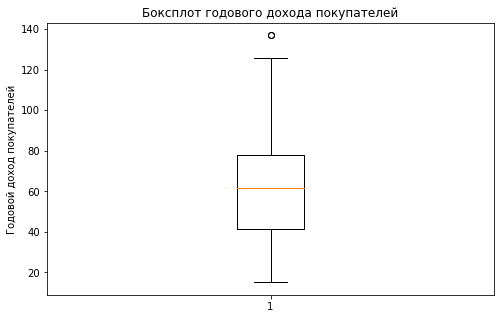

In [10]:
plt.figure(figsize = (8,5))
plt.boxplot(df['Annual Income (k$)'])
plt.ylabel('Годовой доход покупателей')
plt.title('Боксплот годового дохода покупателей')
plt.show();


In [11]:
stats = df.groupby('Sex', as_index = False).agg({'CustomerID': 'count'})
stats

,Sex,CustomerID
0,Female,112
1,Male,88


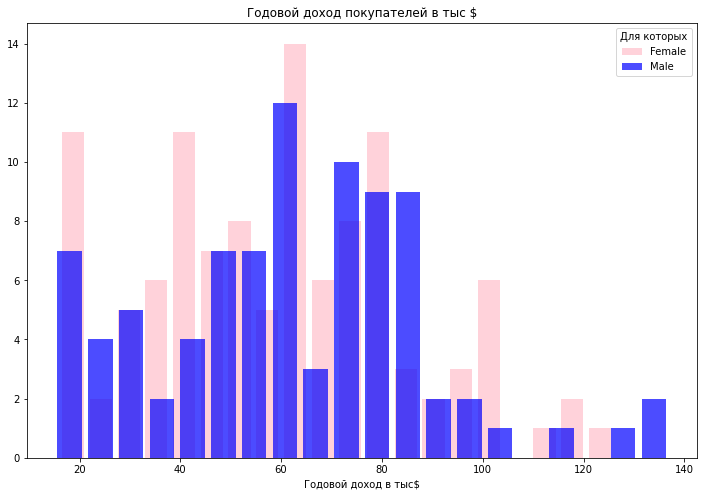

In [12]:
colors = {'Female': 'pink', 'Male': 'blue'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Annual Income (k$)'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Годовой доход в тыс$')
plt.title('Годовой доход покупателей в тыс $')
plt.show();


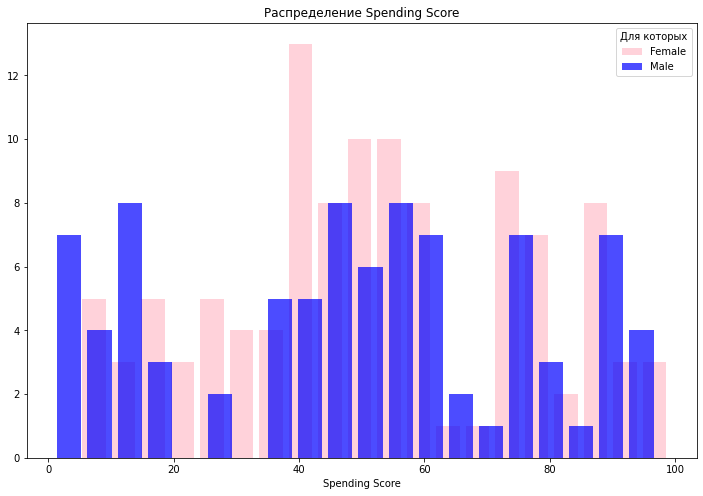

In [13]:
colors = {'Female': 'pink', 'Male': 'blue'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Spending Score'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Spending Score')
plt.title('Распределение Spending Score')
plt.show();


In [14]:
df[df['Sex'] == 'Female']['Spending Score'].corr(df['Annual Income (k$)'])

0.0475421169490391

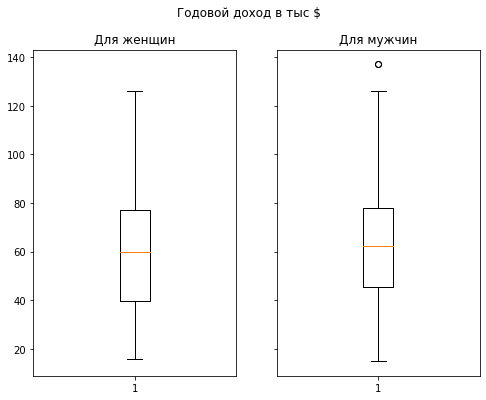

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6), sharey = True)
ax1.boxplot(df[df['Sex'] == 'Female']['Annual Income (k$)'])
ax2.boxplot(df[df['Sex'] == 'Male']['Annual Income (k$)'])
ax1.set_title('Для женщин')
ax2.set_title('Для мужчин')
fig.suptitle('Годовой доход в тыс $')
plt.show();

In [16]:
df.to_csv('new_mall_customers.csv', index = False)

In [49]:
stats_ss = df.groupby('Age', as_index = False).agg({'Spending Score': 'median'})
stats_ss = stats_ss.rename(columns={'Spending Score':'Median of SS'})
stats_ss.head()

,Age,Median of SS
0,18,53.5
1,19,48.0
2,20,49.0
3,21,73.0
4,22,76.0


In [42]:
stats_ai = df.groupby('Age', as_index = False).agg({'Annual Income (k$)': 'median'})
stats_ai = stats_ai.rename(columns={'Annual Income (k$)':'Median of AI'})
stats_ai.head()

,Age,Median of AI
0,18,53.5
1,19,63.5
2,20,37.0
3,21,33.0
4,22,20.0


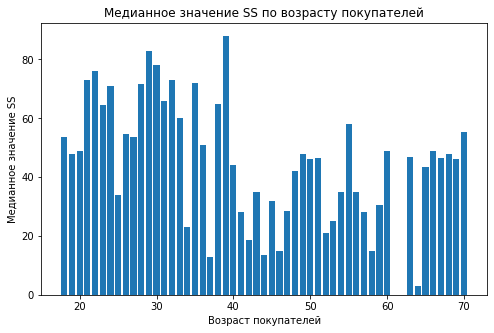

In [50]:

plt.figure(figsize = (8,5))
plt.bar(stats_ss['Age'], stats_ss['Median of SS'])
plt.xlabel('Возраст покупателей')
plt.ylabel('Медианное значение SS')
plt.title('Медианное значение SS по возрасту покупателей')
plt.show();

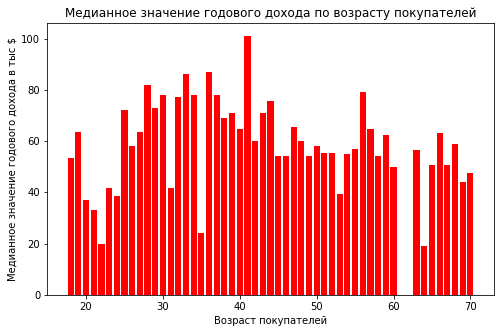

In [45]:
plt.figure(figsize = (8,5))
plt.bar(stats_ai['Age'], stats_ai['Median of AI'], color = 'red')
plt.xlabel('Возраст покупателей')
plt.ylabel('Медианное значение годового дохода в тыс $')
plt.title('Медианное значение годового дохода по возрасту покупателей')
plt.show();

In [51]:
stats_ss['Age'].corr(stats_ss['Median of SS'])

-0.43179485209961554

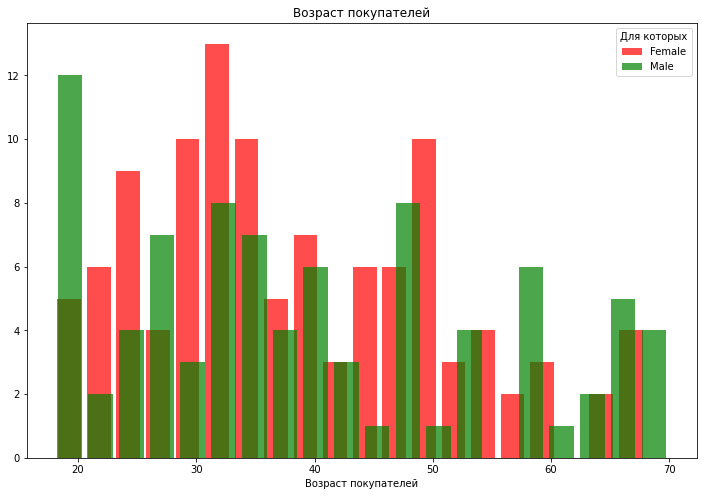

In [37]:
colors = {'Female': 'red', 'Male': 'green'}
fix, ax = plt.subplots(figsize = (12, 8))
for Sex in colors:
    color = colors[Sex]
    data = df[df['Sex'] == Sex]
    ax.hist(data['Age'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7)
plt.legend(colors, title = 'Для которых')
plt.xlabel('Возраст покупателей')
plt.title('Возраст покупателей')
plt.show();